# **Neural Networks**

## **1. Introduction to Neural Networks**

Artificial Neural Networks (ANNs) are computational models inspired by the human brain. They consist of layers of interconnected neurons that process data and learn patterns.

### **Key Components of a Neural Network:**

- **Neuron (Perceptron):** Basic unit of computation.
- **Weights & Biases:** Parameters that adjust during learning.
- **Activation Function:** Determines neuron output.
- **Layers:**
  - **Input Layer**: Takes raw data as input.
  - **Hidden Layers**: Process and learn patterns.
  - **Output Layer**: Provides the final result.

---

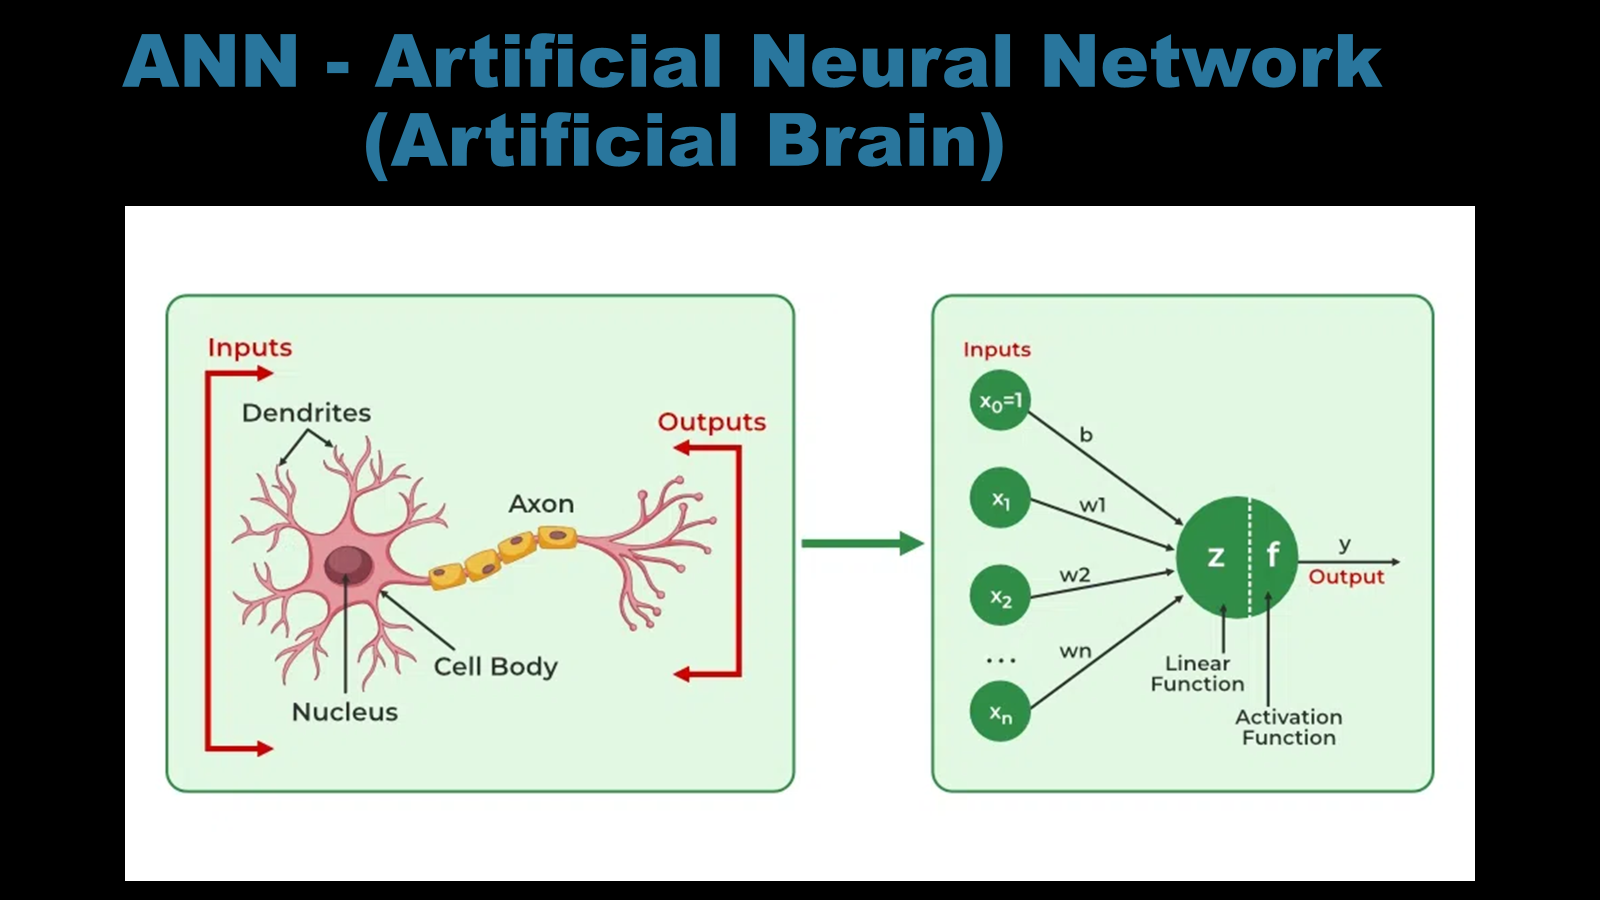

## **2. Structure and Function of a Single Neuron**

A single-layer perceptron computes a weighted sum of inputs and applies an activation function.

### **Mathematical Model:**

$$ y = f\left(\sum(w_i \cdot x_i) + b\right) $$
where:

- $$ x_i = Inputs  $$
- $$ w_i = Weights $$  
- $$ b = Bias  $$
- $$ f = Activation Function  

---

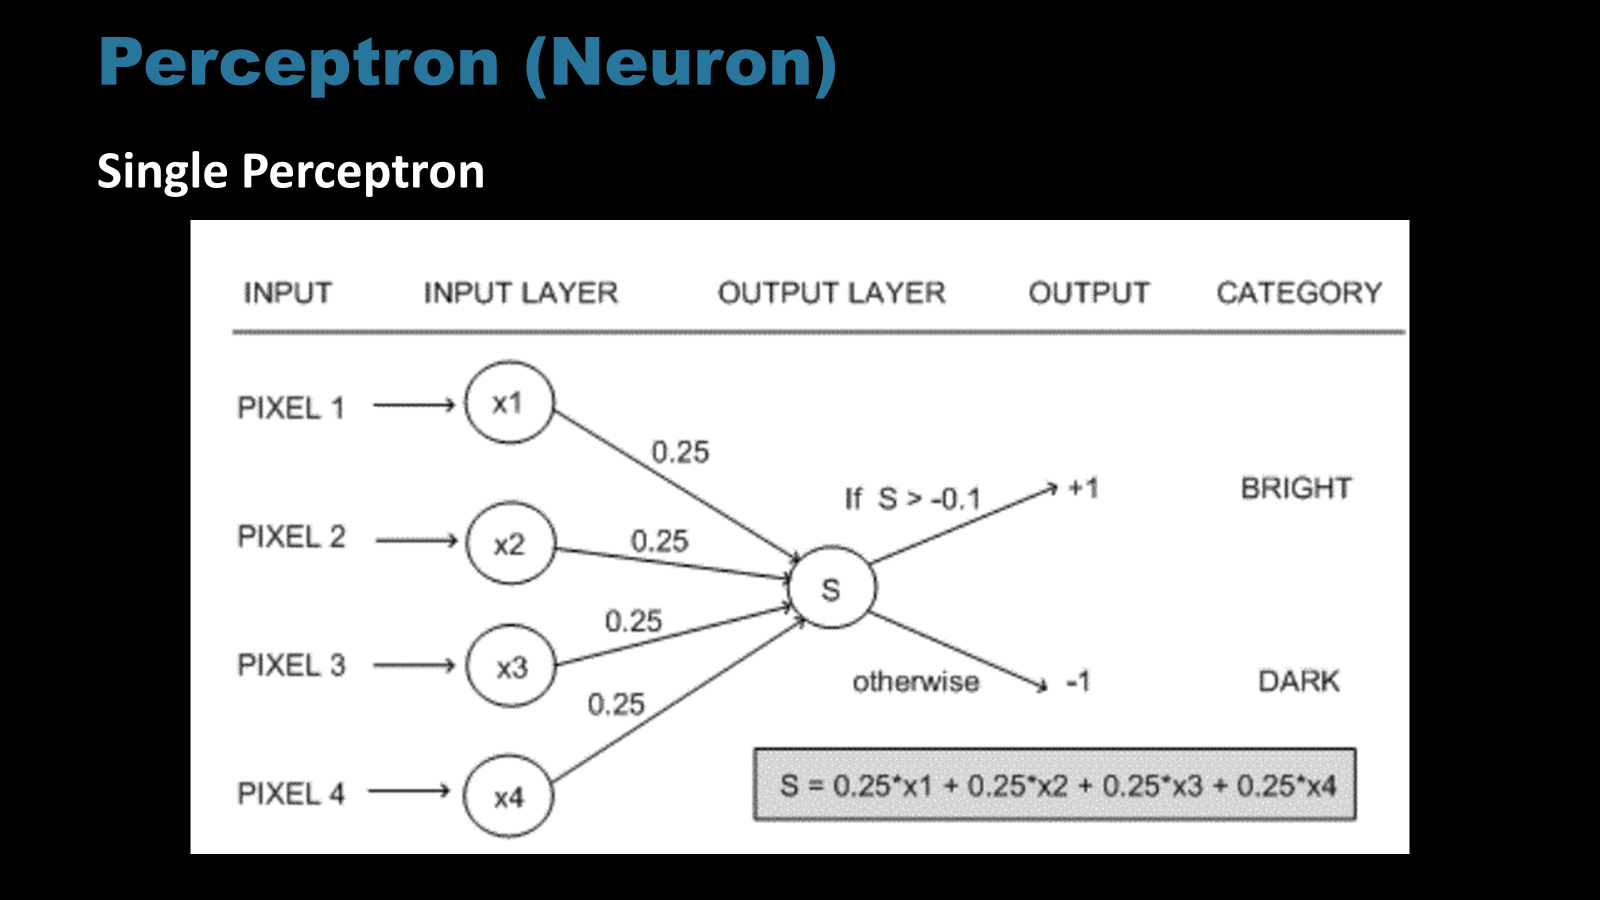

## **3. Hands-on: Implementing a Perceptron from Scratch**

In [ ]:
# install numpy
%pip install numpy  # Uses pip magic command to install the numpy library required for numerical computations

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np  # Imports numpy library for numerical and array operations

class Perceptron:  # Defines a Perceptron class to implement a single-layer neural network
    def __init__(self, input_size, lr=0.1, epochs=10):  # Constructor that initializes the perceptron with input size, learning rate, and number of epochs
        self.weights = np.random.randn(input_size + 1)  # Initializes random weights for inputs and bias (input_size + 1 for bias term)
        self.lr = lr  # Stores the learning rate (controls how much weights update during training)
        self.epochs = epochs  # Stores the number of epochs (iterations through training data)

    def activation(self, x):  # Defines the activation function (step function)
        return 1 if x >= 0 else 0  # Returns 1 if input is non-negative, else returns 0 (binary output)

    def train(self, X, y):  # Defines the training method that learns from input and output data
        X = np.c_[X, np.ones(X.shape[0])]  # Adds a column of ones to X for the bias term (column concatenation)
        for _ in range(self.epochs):  # Loops through the training data for the specified number of epochs
            for i in range(X.shape[0]):  # Loops through each training sample
                y_pred = self.activation(np.dot(self.weights, X[i]))  # Computes the predicted output by applying weights and activation function
                error = y[i] - y_pred  # Calculates the error as the difference between actual and predicted values
                self.weights += self.lr * error * X[i]  # Updates weights using the Perceptron learning rule (Hebbian learning)

    def predict(self, X):  # Defines the prediction method for new data
        X = np.c_[X, np.ones(X.shape[0])]  # Adds a column of ones to X for the bias term
        return np.array([self.activation(np.dot(self.weights, x)) for x in X])  # Returns predictions by applying the learned weights and activation function

# Example: OR Logic Gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Creates input data for OR gate (all possible 2-bit combinations)
y = np.array([0, 1, 1, 1])  # Creates expected outputs for OR gate (1 if at least one input is 1)

model = Perceptron(input_size=2)  # Creates a Perceptron instance with 2 inputs
model.train(X, y)  # Trains the perceptron on the OR gate data
print("Predictions:", model.predict(X))  # Prints the model's predictions for all input combinations

Predictions: [1 1 1 1]


**Explanation:** A perceptron is trained on OR gate logic using simple weight updates.

---

## **4. Multi-Layer Perceptron (MLP)**

MLPs consist of multiple layers with nonlinear activation functions to learn complex patterns.

### **Common Activation Functions:**

- **Sigmoid:** $$ f(x) = \frac{1}{1+e^{-x}} $$  
- **ReLU:** $$ f(x) = \max(0, x) $$  
- **Softmax:** Typically used in multi-class classification, expressed as $$ f(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}} $$

### **Implementing a Multi-Layer Perceptron using TensorFlow**

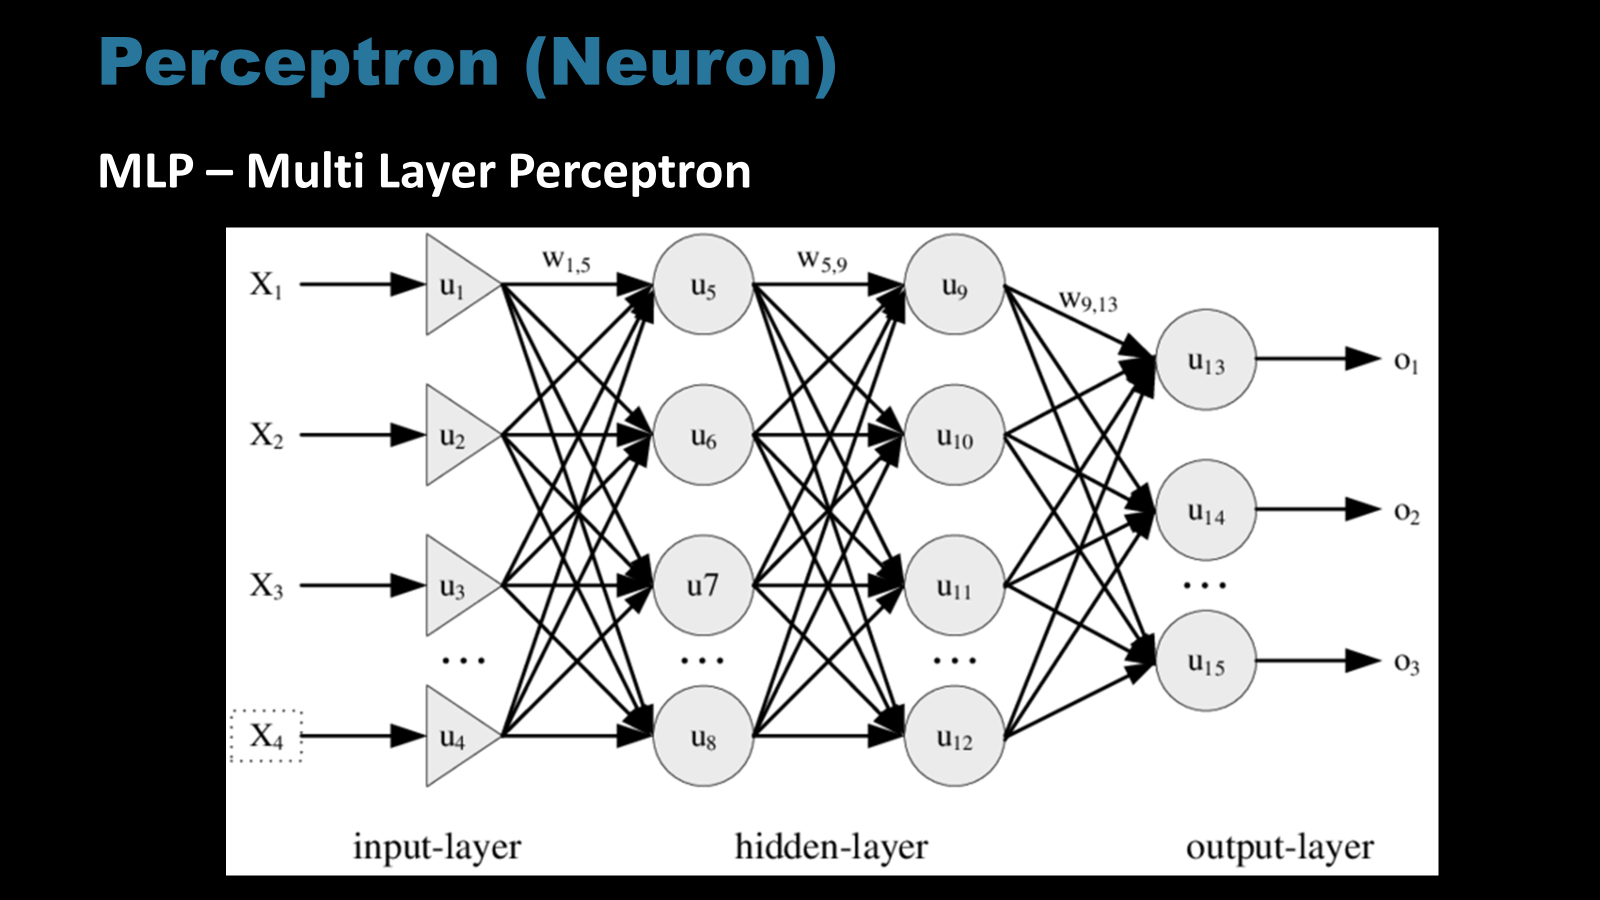

Tensorflow Playground


https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.22375&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

In [ ]:
# install tensorflow
%pip install tensorflow  # Uses pip magic command to install TensorFlow/Keras for building neural networks

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [ ]:
import tensorflow as tf  # Imports TensorFlow library for deep learning
from tensorflow.keras.models import Sequential  # Imports Sequential model class for building layer-by-layer neural networks
from tensorflow.keras.layers import Dense  # Imports Dense layer class for fully connected layers
import numpy as np  # Imports numpy for numerical operations

# Sample Data: XOR Gate
X = np.array([[0,0], [0,1], [1,0], [1,1]])  # Creates input data for XOR gate (all possible 2-bit combinations)
y = np.array([[0], [1], [1], [0]])  # Creates expected outputs for XOR gate (1 if exactly one input is 1)

# Building the MLP Model
model = Sequential([  # Creates a Sequential model (layers are stacked sequentially)
    Dense(4, activation='relu', input_shape=(2,)),  # Adds a hidden layer with 4 neurons, ReLU activation, and 2 inputs
    Dense(1, activation='sigmoid')  # Adds an output layer with 1 neuron and sigmoid activation for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Compiles the model with Adam optimizer, binary crossentropy loss, and accuracy metric
model.fit(X, y, epochs=500, verbose=0)  # Trains the model for 500 epochs on the XOR data (verbose=0 suppresses output)
print("Predictions:", model.predict(X).round())  # Makes predictions on the training data and prints them rounded to nearest integer

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predictions: [[0.]
 [0.]
 [1.]
 [0.]]


**Explanation:** An MLP learns the XOR function using a hidden layer with ReLU activation.

---

## **5. Differences Between ANN and Human Brain**

| Feature          | Artificial Neural Network | Human Brain               |
| ---------------- | ------------------------- | ------------------------- |
| Learning         | Supervised, Reinforcement | Unsupervised, Adaptive    |
| Processing Speed | Fast for computation      | Slower but more efficient |
| Parallelism      | Limited                   | Highly parallel           |
| Generalization   | Requires large data       | Learns from few examples  |

---

## **6. Applications of Neural Networks**

- Image Recognition (e.g., Face Detection)
- Speech Recognition (e.g., Google Assistant, Siri)
- Fraud Detection (e.g., Credit Card Fraud)
- Autonomous Vehicles (e.g., Self-driving cars)

---



## **Linear vs Non-Linear Graph** 

![Linear vs nonliniear.png](<attachment:Linear vs nonliniear.png>)
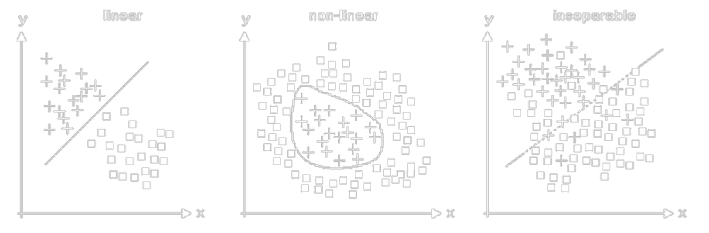